## Data-preprocessing

- dealing with missing data

- Handling categorical data

- outlier detection

- feature selection

- feature scaling

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset/adult.csv',header=None,names=['age','workclass','fnlwgt','education','education-num','marital-status',
                                                        'occupation','relationship','race','gender','capital-gain',
                                                       'capital-loss','hours-per-week','native-country','income'])

In [3]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [4]:
df[(df.workclass==' ?') | (df.occupation==' ?')].shape
#[^A-Za-z0-9]  reg exp
#re.search()

(3686, 15)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.shape

(65122, 15)

In [7]:
df.income.value_counts()

 <=50K    49440
 >50K     15682
Name: income, dtype: int64

In [ ]:
df.isnull().sum()

In [ ]:
df[df.workclass==' ?'].shape

In [ ]:
df.select_dtypes(include=['object']).columns

In [8]:
col_names = df.columns
num_data = df.shape[0]
for c in col_names:
    num_non = df[c].isin([" ?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        #print ("{}".format(float(num_non) / num_data * 100))
        print ("\n")


workclass
3672


occupation
3686


native-country
1166




In [9]:
df = df[df["workclass"] != " ?"]
df = df[df["occupation"] != " ?"]
df = df[df["native-country"] != " ?"]


In [10]:
df.shape

(60324, 15)

### take a look for outcome variable(income)

In [11]:
df.income.value_counts()

 <=50K    45308
 >50K     15016
Name: income, dtype: int64

In [ ]:
df.income[0]

In [12]:
df.income = df.income.map({' <=50K':0,' >50K':1})

In [35]:
#print (df.select_dtypes(include=['object']).columns)
df.workclass.value_counts()

 Private             44572
 Self-emp-not-inc     4998
 Local-gov            4134
 State-gov            2558
 Self-emp-inc         2148
 Federal-gov          1886
 Without-pay            28
Name: workclass, dtype: int64

In [ ]:
df.income.value_counts()

In [31]:
X = df.drop('income',axis=1)

y = df.income

In [32]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [33]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

### dealing with data types

- there are 2 main data types

1: Numeric:age,income
        
2: Categorical:
        
        a:nominal-->gender
            
        b:ordinal-->T-shirt size(M,L,XL)..i.e any mathematical order
            

- Models can only handle numeric features


- Must convert nominal and ordinal features into numeric features

      - label encoding for ordinal features

      - one hot encoding for nominal features

In [36]:
### Education is a categorical feature
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [37]:
df.select_dtypes(include=['object']).head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [38]:
### one hot encoding for nominal features using get_dummies() in pandas
### another option,OneHotEncoder class in scikit-learn

pd.get_dummies(df['gender']).head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [39]:
### decide  which categorical features we want to use in model

for col_name in df.columns:
    if df[col_name].dtypes=='object':
        unique_cat = df[col_name].nunique()
        
        print('feature {} has {} unique categories'.format(col_name,unique_cat))

feature workclass has 7 unique categories
feature education has 16 unique categories
feature marital-status has 7 unique categories
feature occupation has 14 unique categories
feature relationship has 6 unique categories
feature race has 5 unique categories
feature gender has 2 unique categories
feature native-country has 41 unique categories


In [40]:
df['native-country'].value_counts()

 United-States                 55008
 Mexico                         1220
 Philippines                     376
 Germany                         256
 Puerto-Rico                     218
 Canada                          214
 El-Salvador                     200
 India                           200
 Cuba                            184
 England                         172
 Jamaica                         160
 South                           142
 Italy                           136
 China                           136
 Dominican-Republic              134
 Vietnam                         128
 Guatemala                       126
 Japan                           118
 Columbia                        112
 Poland                          112
 Haiti                            84
 Iran                             84
 Taiwan                           84
 Portugal                         68
 Nicaragua                        66
 Peru                             60
 Greece                           58
 

In [41]:
%matplotlib inline

import matplotlib.pyplot as plt

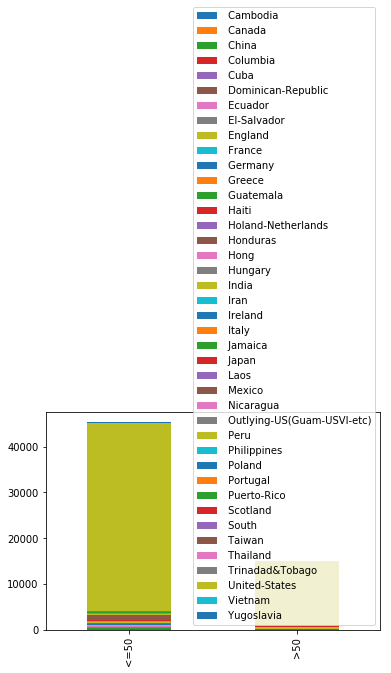

In [42]:
lt_50=df[df.income==0]['native-country'].value_counts()
gt_50 = df[df.income==1]['native-country'].value_counts()

df_new = pd.DataFrame([lt_50,gt_50])
df_new.index = ['<=50','>50']
df_new.plot(kind='bar',stacked=True)

In [44]:
df['native-country'].value_counts()

US        55008
others     5316
Name: native-country, dtype: int64

In [43]:
df['native-country'] = ['US' if x==' United-States' else 'others' for x in df['native-country']]

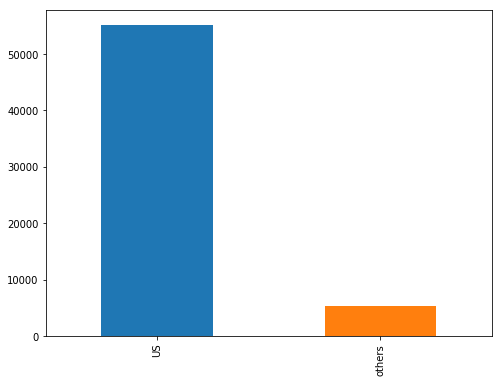

In [45]:
plt.figure(figsize=(8,6))
df['native-country'].value_counts().plot(kind='bar')
#df['native-country'].nunique()

plt.show()

In [46]:
df['native-country'].value_counts()

US        55008
others     5316
Name: native-country, dtype: int64

In [47]:
df.select_dtypes(include=['object']).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

In [48]:
c=df.select_dtypes(include=['object'])

In [49]:
X1=pd.get_dummies(df[c.columns])

In [52]:
X1.shape

(60324, 59)

In [53]:
new_df=pd.concat([X1,df.select_dtypes(exclude=['object'])],axis=1)

In [54]:
new_df.shape

(60324, 66)

In [55]:
z=df.select_dtypes(exclude=['object']).columns

In [56]:
new_df[z]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0
5,37,284582,14,0,0,40,0
6,49,160187,5,0,0,16,0
7,52,209642,9,0,0,45,1
8,31,45781,14,14084,0,50,1
9,42,159449,13,5178,0,40,1


In [57]:
X= new_df.drop('income',1)

In [58]:
y = new_df['income']

In [ ]:
## fill missing values with most frequent

In [ ]:
data = pd.read_csv('dataset/weather_data.txt',parse_dates=['day'])

In [ ]:
data.dtypes

In [ ]:
data.isnull().sum()

In [ ]:
## How to fill categorical feature with most frequent data

In [ ]:
data.event.value_counts()

In [ ]:
data.event = data.event.fillna(data['event'].value_counts().index[0])

In [ ]:
data.event.value_counts()

In [ ]:
new_df = data.fillna({
    'temperature':data.temperature.median(),
    'windspeed':data.windspeed.median(),
    'event':data['event'].value_counts().index[0]
})

In [ ]:
new_df.isnull().sum()

### Features selection and model building

In [59]:
from sklearn.model_selection import train_test_split

#cross validation

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [62]:
print (df.shape)
X_train.shape

(60324, 15)


(45243, 65)

In [74]:
## large set of features can cause overfitting
from sklearn.feature_selection import SelectKBest

select = SelectKBest(k=15)
selected_features = select.fit(X_train,y_train)

In [75]:
indices = selected_features.get_support(indices=True)
col_select = [X.columns[i] for i in indices]

In [76]:
col_select

['education_ Bachelors',
 'education_ Masters',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Never-married',
 'occupation_ Exec-managerial',
 'occupation_ Prof-specialty',
 'relationship_ Husband',
 'relationship_ Not-in-family',
 'relationship_ Own-child',
 'gender_ Female',
 'gender_ Male',
 'age',
 'education-num',
 'capital-gain',
 'hours-per-week']

In [77]:
X_train_new = X_train[col_select]
X_test_new = X_test[col_select]

In [78]:
X_train_new.shape

(45243, 15)

In [79]:
X_test_new.shape

(15081, 15)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [81]:
log=LogisticRegression()

In [82]:
log.fit(X_train_new,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
y_prob = [i[1] for i in log.predict_proba(X_test_new)]
#log.predict()

## if we have imbalance classification data,then use roc_auc_score

In [84]:
#accuracy_score(y_test,pred)
#log.score(X_test,y_test)

In [85]:
roc_auc_score(y_test,y_prob)

0.8850649439523177

## build model using unprocessed data

In [13]:
df.shape

(60324, 15)

In [14]:
df_1 = df

## remove non-numeric columns

df_1 = df_1.select_dtypes(exclude=['object'])

In [15]:
df_1.shape

(60324, 7)

In [17]:
df_1.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [ ]:
df_1.head()

In [ ]:
df_1.head()

In [18]:
X_new=  df_1.drop('income',1)
y_new = df_1.income

In [19]:
X_new.shape

(60324, 6)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [21]:
##split data

X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_new,y_new,test_size=.25,random_state=0)

In [22]:
log1=LogisticRegression()
log1.fit(X_train_1,y_train_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
#for i in log1.predict_proba(X_test_1):
 #   print (i)

In [23]:
y_p = [i[1] for i in log1.predict_proba(X_test_1)]

In [30]:
roc_auc_score(y_test_1,y_p)

0.575272875980094